# 🌳 Random Forest Classifier – A Powerful Ensemble Learning Technique
# 🔍 Introduction to Random Forest
## Random Forest is a supervised machine learning algorithm used
## for both classification and regression tasks. 
## It builds multiple decision trees andcombines their results to make a final prediction, a technique known as ensemble learning.

## 1. Imoort Necessary Libraries

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn 

## 2. Load the Dataset

In [200]:
df = pd.read_csv("/kaggle/input/concrete-data/concrete_data.csv")

## See the Dataset

In [201]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## 3. Information About The Dataset

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


## 4.Exploratory Data Analysis of The Dataset

## Distribution of Each Column

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


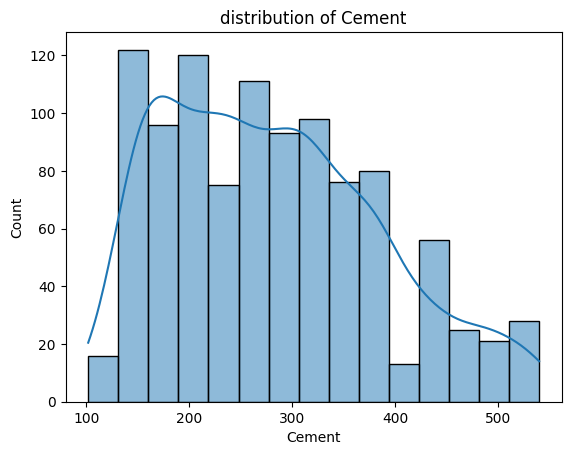

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


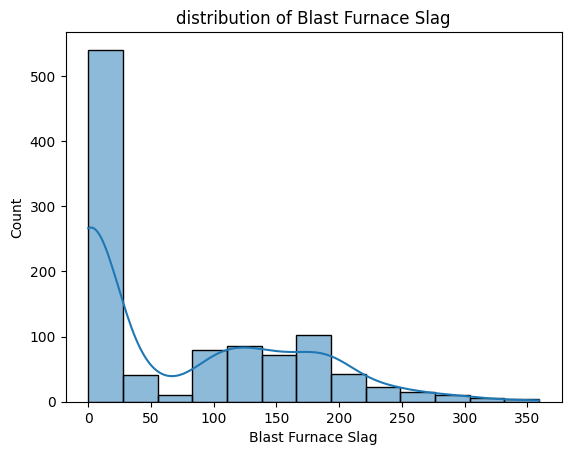

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


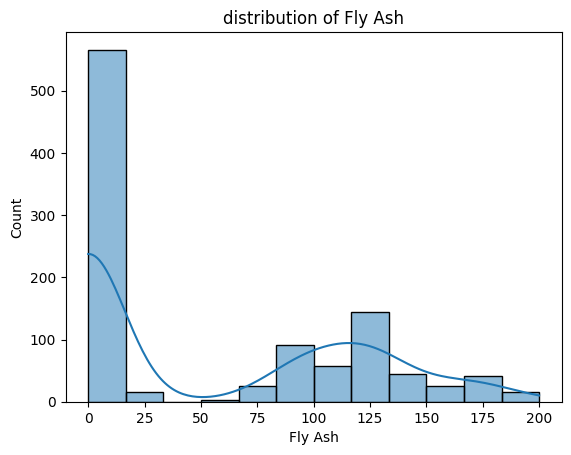

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


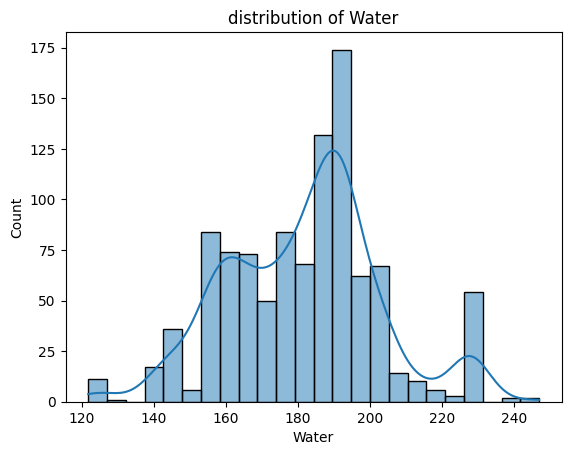

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


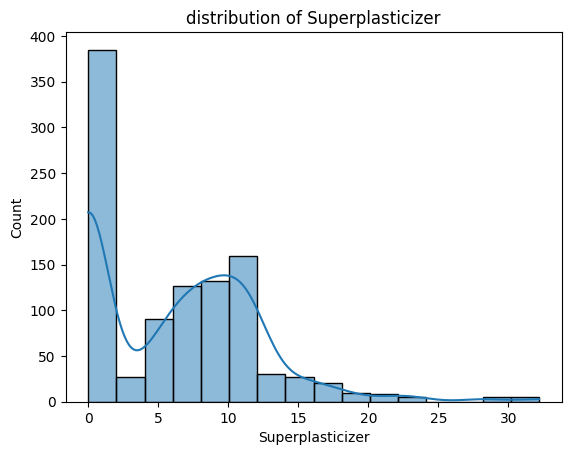

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


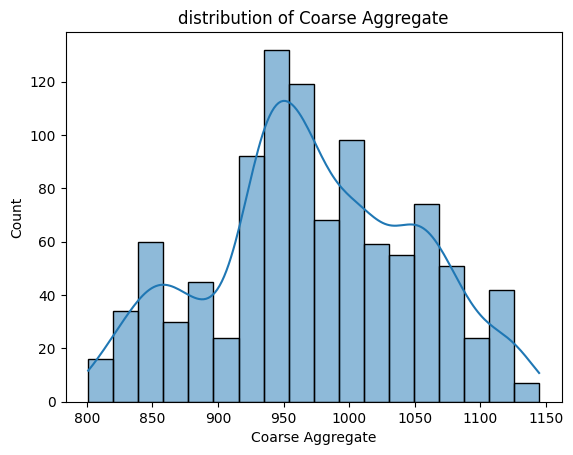

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


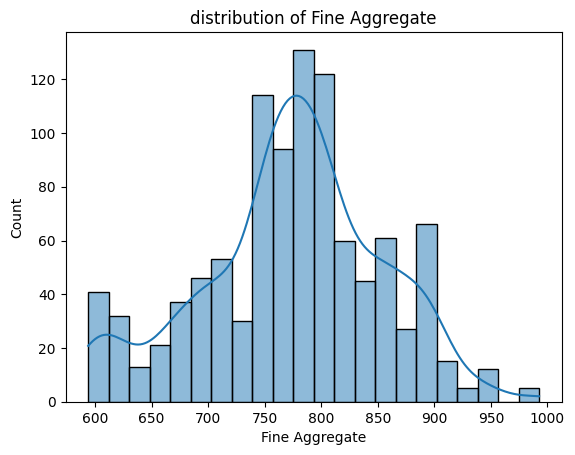

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


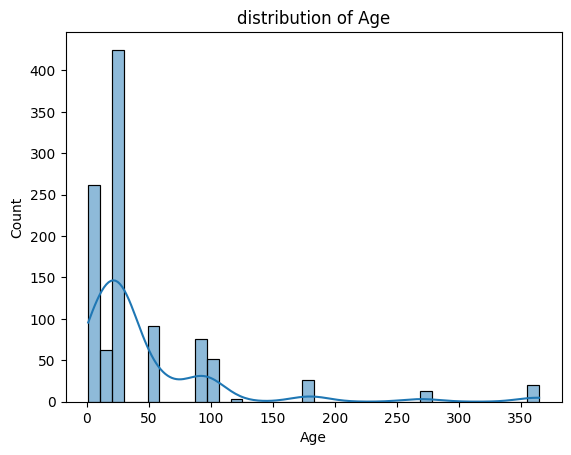

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


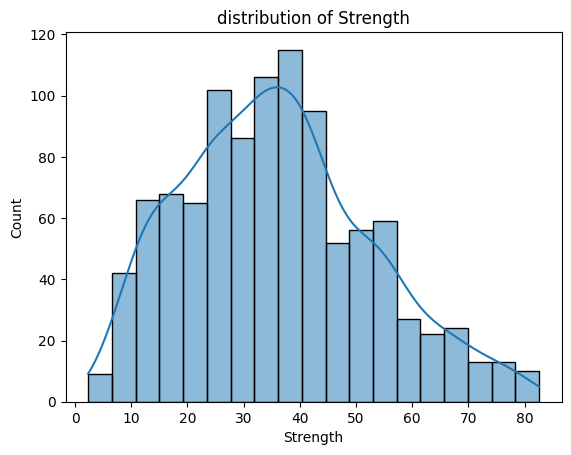

In [203]:
for col in df:
    sns.histplot(df[col],kde=True)
    plt.title(f"distribution of {col}")
    plt.show()

### Correlation Between Each and Every Column

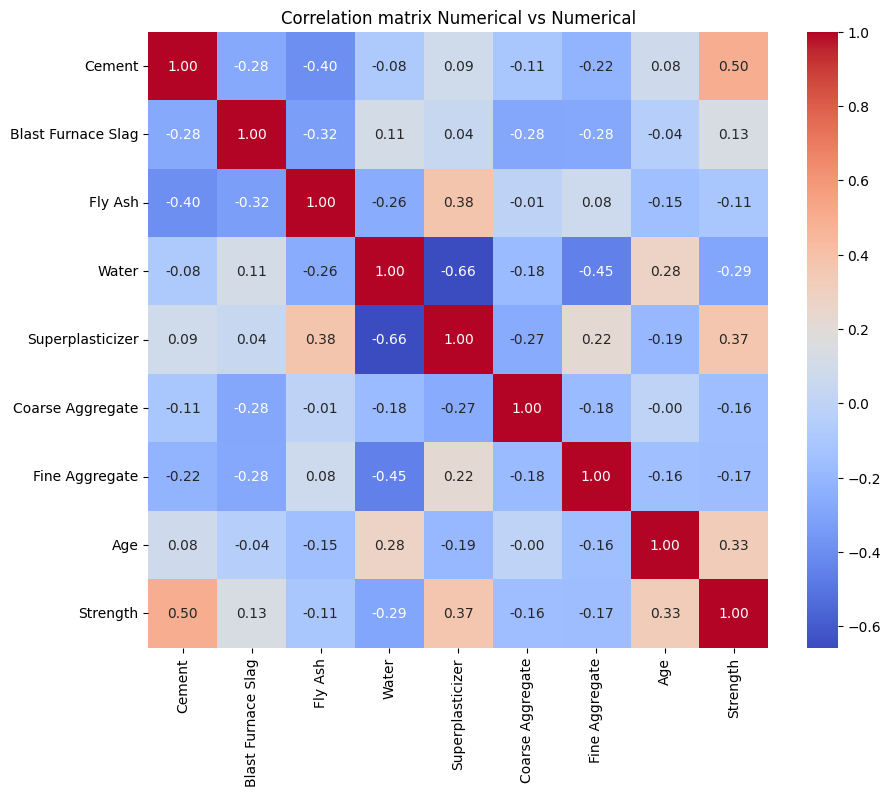

In [204]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation matrix Numerical vs Numerical")
plt.show()

### Scatter Plot Between Numerical Columns

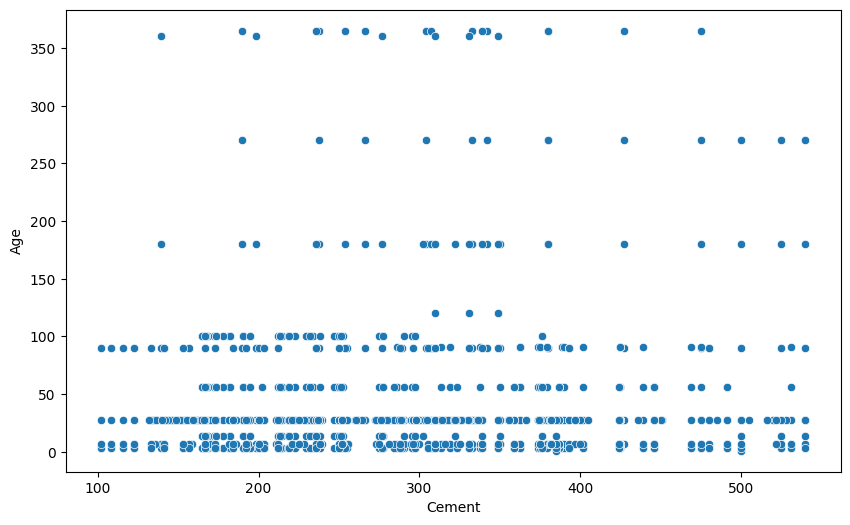

In [205]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='Cement',y='Age',data=df)
plt.show()

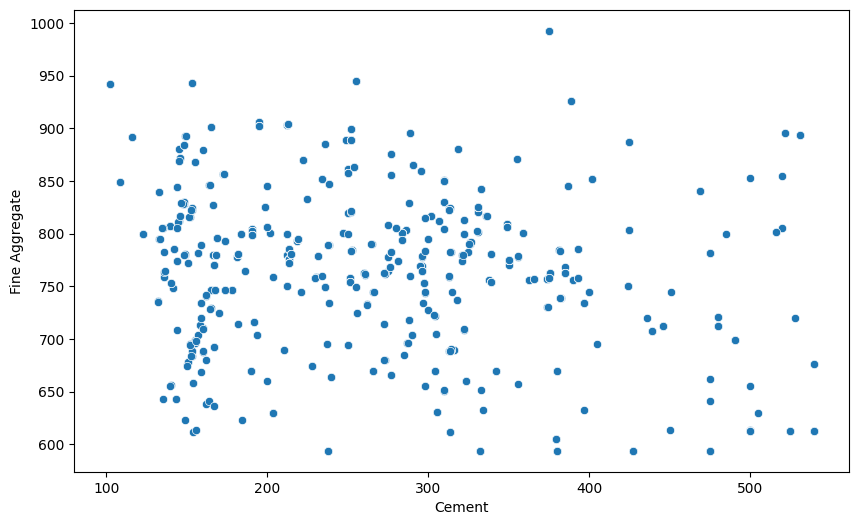

In [206]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cement',y='Fine Aggregate',data=df)
plt.show()

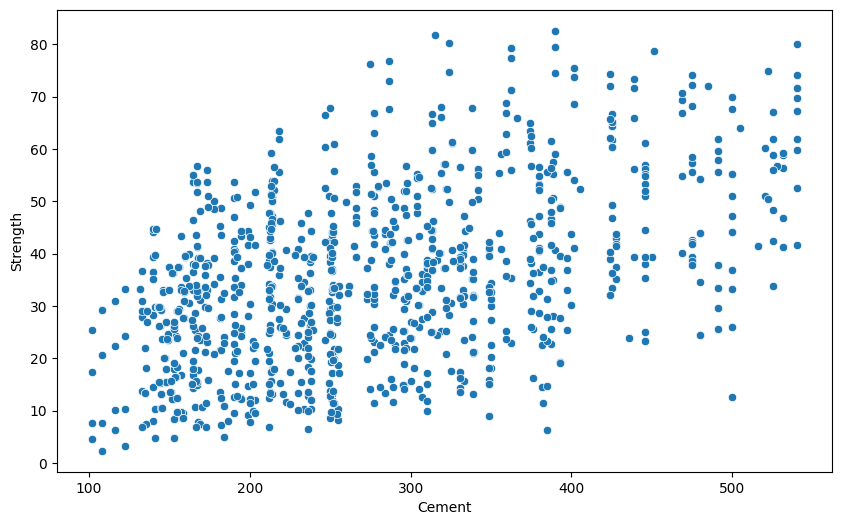

In [207]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cement',y='Strength',data=df)
plt.show()

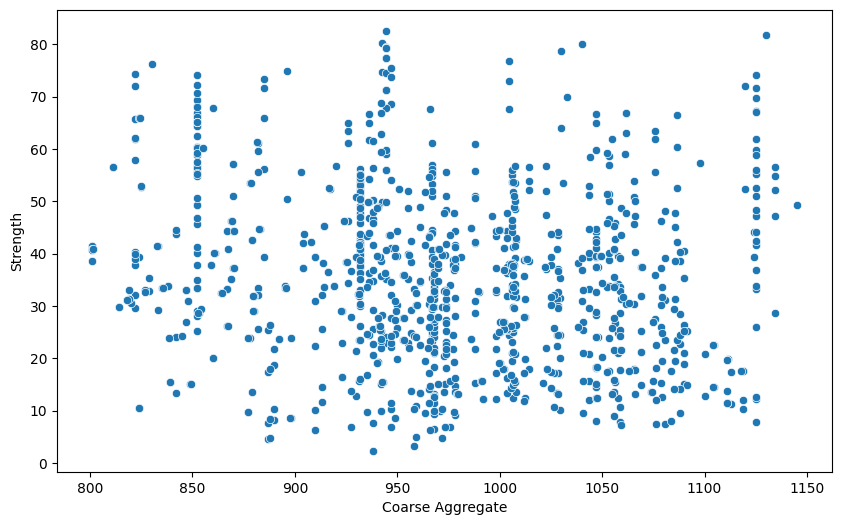

In [208]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Coarse Aggregate',y='Strength',data=df)
plt.show()

## 5. Separate the Independent Variable and Dependent Variable

In [209]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

## Import Algorithm

In [210]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


## 6. Separating the data into Training and Testing Dataset

In [211]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## 7. Make a Object of the classes

In [212]:
scaler = StandardScaler()
rf = RandomForestRegressor(n_estimators=100,bootstrap=True,max_depth=100,random_state=42)

## 8. Using Pipeline 

In [213]:
pipeline = Pipeline([
    ('scaler',scaler),
    ('rf',rf)
])

## 9. Fit the model

In [214]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(max_depth=100, random_state=42))])

## 10. Predict the y_value 

In [215]:
y_pred = pipeline.predict(X_test)

In [216]:
y_pred

array([51.8585    , 40.6702    , 71.2509    , 34.7163    , 11.3759    ,
       44.3706    , 24.1831    , 49.7436    , 37.347     , 42.3598    ,
       41.3045    , 15.2111    , 38.956     , 34.93208   , 23.93      ,
       22.5952    , 36.5898    , 17.2017    , 37.9102    , 31.6758    ,
       36.6045    , 36.9285    , 46.2675    , 11.7137    , 32.7899    ,
       39.7156    , 11.7448    , 43.6215    , 53.009     , 15.302     ,
       57.590625  , 33.6773    , 42.2092    , 49.1275    , 17.4901    ,
       39.3153    , 36.82      , 43.1126    ,  9.1467    , 50.56775   ,
       16.59      ,  5.1563    , 41.2918    , 49.5274375 , 13.0703    ,
       64.4805    , 52.9910625 , 34.5228    , 26.373     ,  7.7606    ,
       56.2866    , 42.4542    , 26.1614    , 18.0667    , 44.706     ,
       34.66006667, 27.4752    , 12.2871    , 35.7719    , 20.0084    ,
       43.2128    , 14.9722    , 36.2528    , 50.9949    , 32.1696    ,
       23.9207    , 34.2027    , 13.3593    , 30.4649    , 24.58

In [217]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: Strength, Length: 206, dtype: float64

## 11. Check Accuracy

In [218]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8841688335094583
3.734132387309294
29.847015251758407


In [221]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Print the scores
print("Cross-validation scores (R²):", scores)
print("Mean R² score:", np.mean(scores))

Cross-validation scores (R²): [0.88870083 0.91164369 0.91247045 0.90625347 0.91562671]
Mean R² score: 0.9069390313303227


In [222]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best R² Score: 0.9068944429624299


## 12. Plot Regression Line

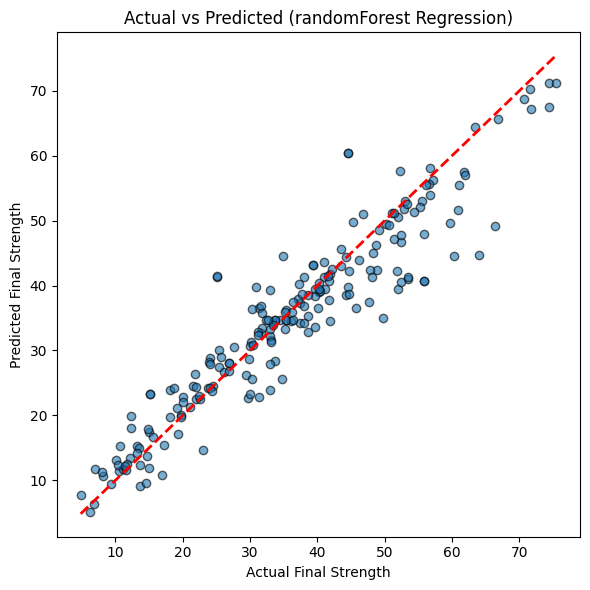

In [224]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Final Strength')
plt.ylabel('Predicted Final Strength')
plt.title('Actual vs Predicted (randomForest Regression)')
plt.tight_layout()
plt.show()